In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
customers=pd.read_csv('/Users/nihaalnadaf/Downloads/Customers.csv')
products=pd.read_csv('/Users/nihaalnadaf/Downloads/Products.csv')
transactions=pd.read_csv('/Users/nihaalnadaf/Downloads/Transactions.csv')

In [7]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [13]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [15]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [19]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [21]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [25]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [27]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Merge the datasets


In [38]:
cust_tran=transactions.merge(customers, on='CustomerID', how='left')
data=cust_tran.merge(products, on='ProductID', how='left')

In [46]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [48]:
data=data.drop(columns='Price_y')

In [52]:
data['ProductPrice']=data['Price_x']


In [56]:
data=data.drop(columns='Price_x')

In [58]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,ProductPrice
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [60]:
data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
ProductPrice       0
dtype: int64

**No Missing or NULL values**

# EDA

<Axes: title={'center': 'Signups Over Time'}, xlabel='YearMonth'>

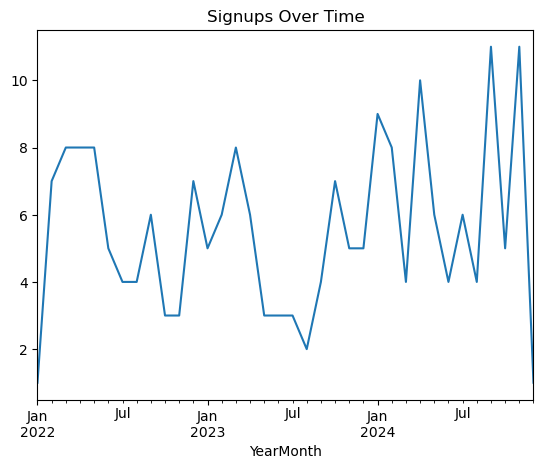

In [65]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')
customers.groupby('YearMonth').size().plot(kind='line', title='Signups Over Time')

**We can come to a conclusion that signups are totally random and add No value to the data**

## Top Customers by Revenue

In [67]:
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

In [84]:
top_customers.head(10)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

**Above are the customers contributing most revenue**

In [80]:
top_10_revenue = top_customers.head(10).sum() / top_customers.sum() * 100

In [82]:
top_10_revenue

11.016492627865604

**The percentage contribution of the top 10 customers to total revenue is about 11.01% (Which is a Significant Amount)**

## Best-Selling Products

In [89]:
best_selling_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

In [91]:
best_selling_products

ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int64

In [97]:
best_selling_percentage = best_selling_products.head(10).sum() / best_selling_products.sum() * 100

In [99]:
best_selling_percentage

30.508474576271187

**The percentage of total sales for the top 10 products is 30.5%**

## Sales Trend

In [105]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month

In [109]:
monthly_sales = data.groupby('Month')['TotalValue'].sum()

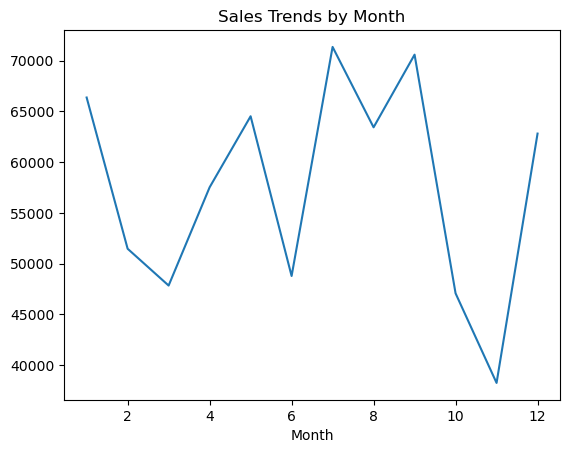

In [113]:
monthly_sales.plot(kind='line', title='Sales Trends by Month')
plt.show()

**We can conclude that sales hiked from months seven to nine** 

## Region-Wise Sales Performance

In [116]:
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

In [118]:
region_sales

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

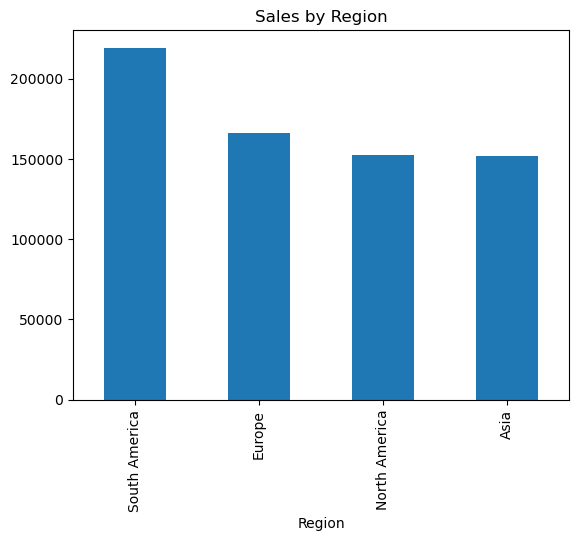

In [120]:
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()

In [122]:
price_revenue = data.groupby('ProductID').agg({'ProductPrice': 'first', 'TotalValue': 'sum'})

In [124]:
price_revenue 

,ProductPrice,TotalValue
ProductID,,
P001,169.30,3047.40
P002,346.30,8657.50
P003,44.12,1367.72
P004,95.69,1722.42
P005,429.31,10303.44
...,...,...
P096,307.47,10453.98
P097,319.34,7983.50
P098,299.93,4798.88


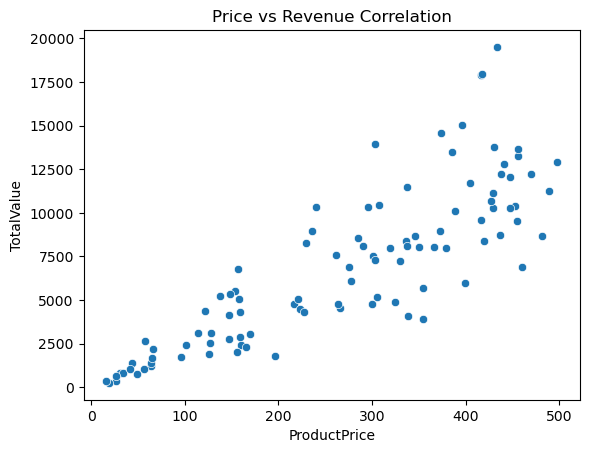

In [128]:
import seaborn as sns
sns.scatterplot(x='ProductPrice', y='TotalValue', data=price_revenue)
plt.title('Price vs Revenue Correlation')
plt.show()

**Product Price and Revenue are highly correlated**